# Importing necessary libraries

In [61]:
import sys
!{sys.executable} -m pip install xgboost

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor as xgbr
import sklearn.datasets

# Getting the Dataset from sklearn.datasets

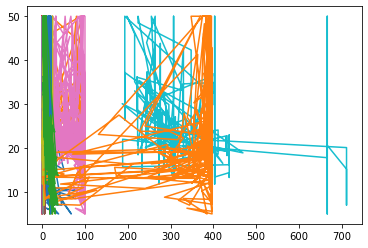

In [63]:
house = sklearn.datasets.load_boston()
plt.plot(house['data'], house['target'])
plt.show()

# Model -> XGBoost Regression Model
### Creating a training and testing set

In [64]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(house['data'], house['target'],test_size=0.2, random_state = 5)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(404, 13) (102, 13) (404,) (102,)


In [65]:
xgb_model = xgbr()
xgb_model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [66]:
y_ = xgb_model.predict(test_x)
y_

array([50.222305 , 27.971481 , 22.522875 , 12.59566  , 37.14303  ,
        7.1677446, 24.48723  , 26.25798  , 20.64651  , 19.577019 ,
       33.705383 , 20.23928  , 19.190409 , 33.8371   , 23.42159  ,
       18.499271 , 13.677314 , 18.943813 , 18.411482 , 27.397846 ,
       14.741348 , 19.075645 , 44.715538 , 21.358618 , 30.80713  ,
       11.512623 , 23.754955 , 20.728378 , 22.309786 , 27.440355 ,
       17.484293 , 14.642067 , 11.785898 , 18.93908  , 22.87211  ,
       19.448967 , 24.869833 ,  7.6529675, 45.34331  , 33.58726  ,
       14.825739 , 10.16513  , 24.383171 , 18.679598 , 24.612175 ,
       27.798717 ,  7.730147 , 19.230375 , 19.62305  , 15.200331 ,
       20.446474 , 20.949675 , 22.811346 , 14.491505 , 16.303324 ,
       23.308897 , 43.796196 , 14.34963  , 26.462774 , 19.956573 ,
       18.94716  , 22.301613 , 15.647562 , 34.92483  , 21.026659 ,
        8.605562 , 18.321106 , 23.671476 , 22.204529 , 20.941114 ,
       16.367731 , 25.211397 , 17.700838 , 16.074142 , 26.7809

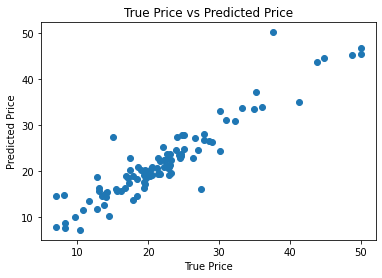

In [67]:
plt.scatter(test_y, y_)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("True Price vs Predicted Price")
plt.show()

### Using R2-Score and MAE for finding accuracy of our regression model

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("R2 Score :",  r2_score(test_y,y_))
print("Mean Absolute Error :" , mean_absolute_error(test_y,y_))

R2 Score : 0.8708881554550579
Mean Absolute Error : 2.110796364615945


### Making a predictive system by getting input vector from user

In [69]:
input_data = (1.345e-01, 0.1e+00, 8.1200e+00, 0.5000e+00, 1.1200e-01,6.6700e+00, 1.2700e+01, 2.5786e+00, 5.8000e+00, 4.1100e+02,2.1200e+01, 4.0129e+02, 2.0600e+01)
input_data = np.array(input_data)
input_data = input_data.reshape(1,-1)
predict_out = xgb_model.predict(input_data)
print("Predicted House Price For Given Input :", predict_out[0])

Predicted House Price For Given Input : 18.756092
